In [1]:
import torch
import matplotlib.pyplot as plt
import json

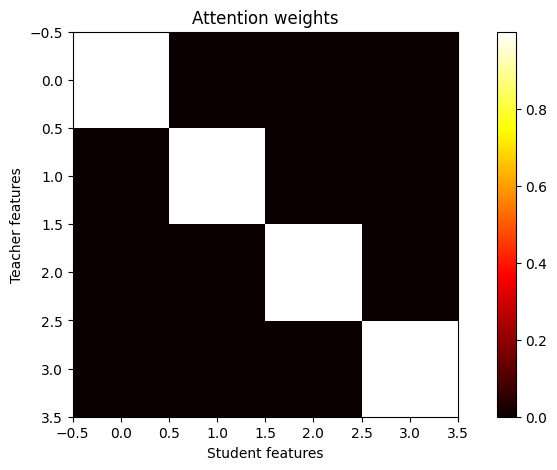

In [9]:
# Step 3: Load attention weights from the JSON file
with open('/root/khanhnnm/se/checkpoint/CMGAN_unet_32_kd_AFD_traditional_force_local_attention_ws=1/checkpoints/attn_weight/attn_weight_1.json', 'r') as f:
    loaded_attention_weights = torch.tensor(json.load(f))

# Step 4: Visualize attention weights
plt.figure(figsize=(10, 5))
plt.imshow(loaded_attention_weights[8].numpy(), cmap='hot', interpolation='nearest')
plt.xlabel('Student features')
plt.ylabel('Teacher features')
plt.title('Attention weights')
plt.colorbar()
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import os

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.utils.deterministic.fill_uninitialized_memory = True
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Generate random data
num_samples = 1000
input_size = 10
output_size = 1

X = torch.randn(num_samples, input_size)  # Random input features
y = torch.randn(num_samples, output_size)  # Random target labels

# Initialize model and optimizer
model = SimpleNN(input_size, hidden_size=20, output_size=output_size)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Reset gradients

    # Forward pass
    outputs = model(X)
    
    # Compute loss (e.g., mean squared error)
    loss = nn.MSELoss()(outputs, y)

    # Backward pass and optimization
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 1.0256
Epoch [20/100], Loss: 1.0110
Epoch [30/100], Loss: 1.0029
Epoch [40/100], Loss: 0.9976
Epoch [50/100], Loss: 0.9936
Epoch [60/100], Loss: 0.9903
Epoch [70/100], Loss: 0.9875
Epoch [80/100], Loss: 0.9851
Epoch [90/100], Loss: 0.9829
Epoch [100/100], Loss: 0.9810


In [1]:
import torch
from s3prl.nn import S3PRLUpstream

model = S3PRLUpstream("wav2vec2")
model.eval()

with torch.no_grad():
    wavs = torch.randn(2, 16000 * 2)
    wavs_len = torch.LongTensor([16000 * 1, 16000 * 2])
    all_hs, all_hs_len = model(wavs, wavs_len)

for hs, hs_len in zip(all_hs, all_hs_len):
    assert isinstance(hs, torch.FloatTensor)
    assert isinstance(hs_len, torch.LongTensor)

    batch_size, max_seq_len, hidden_size = hs.shape
    print(max_seq_len)
    assert hs_len.dim() == 1

/root/quannt40/anaconda3/envs/cmgan/lib/python3.10/site-packages/s3prl/upstream/byol_s/byol_a/common.py:20: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")
ESPnet is not installed, cannot use espnet_hubert upstream
/root/quannt40/anaconda3/envs/cmgan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/quannt40/anaconda3/envs/cmgan/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


100
100
100
100
100
100
100
100
100
100
100
100
100


In [7]:
all_hs[5].shape

torch.Size([2, 100, 768])

In [8]:
a = all_hs[0]
print(a.shape)
# a = a.permute(1, 0, 2)
conv = torch.nn.Conv1d(100, 1, 3, padding=1)

out = conv(a)

# out = out.permute(0, 2, 1, 3)
out.shape

torch.Size([2, 100, 768])


torch.Size([2, 1, 768])

In [4]:
model.train()
for name, param in model.named_parameters():
    if param.requires_grad and param.grad is not None:
        print(f"Parameter '{name}': Gradient norm = {param.grad.norm().item()}")

In [1]:
from transformers import AutoProcessor, WavLMModel
import torch


processor = AutoProcessor.from_pretrained("patrickvonplaten/wavlm-libri-clean-100h-base-plus")
model = WavLMModel.from_pretrained("patrickvonplaten/wavlm-libri-clean-100h-base-plus").to("cuda")

/root/quannt40/anaconda3/envs/cmgan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of WavLMModel were not initialized from the model checkpoint at patrickvonplaten/wavlm-libri-clean-100h-base-plus and are newly initialized: ['wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wavlm.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
# audio file is decoded on the fly
# Example input waveform (replace with your own waveform)
sampling_rate = 16000
noisy_wav = torch.randn(1, 16000)
clean_wav = torch.randn(1, 16000)

inputs = [v.unsqueeze(0).to("cuda") for v in [noisy_wav, clean_wav]]
inputs = {"input_values": torch.concat([noisy_wav, clean_wav]).cuda(), 
          "attention_mask": torch.ones(2, sampling_rate).to(torch.int32).cuda()}

outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

[2, 49, 768]

In [36]:
inputs

{'input_values': tensor([[ 1.1208,  0.5761,  0.7344,  ..., -0.7266,  0.9508,  0.1458],
         [ 1.1123, -0.4942,  0.3371,  ...,  0.0949,  0.8816, -0.0302]],
        device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0', dtype=torch.int32)}

: 

In [34]:
type(torch.ones(2, sampling_rate)[0][0])

torch.Tensor

In [20]:
input_waveform = torch.randn(8, 16000)  # 1-second audio sampled at 16 kHz
inputs = processor(input_waveform.tolist(), sampling_rate=sampling_rate, return_tensors="pt")
inputs = inputs.to("cuda")

In [21]:
inputs

{'input_values': tensor([[-0.3379,  0.9558, -1.5255,  ...,  0.5001, -1.3800, -0.4833],
        [ 0.5274,  0.0069,  0.1042,  ..., -0.9606,  1.0555,  1.1243],
        [-1.8301, -0.2354,  0.4633,  ...,  0.3536,  0.0994, -1.6473],
        ...,
        [-0.5903,  0.0516,  1.0337,  ...,  0.3059, -0.3091, -0.6456],
        [-0.2954, -0.4011,  0.0909,  ..., -0.5112,  0.6355,  0.1455],
        [ 0.1648,  0.0377, -0.1168,  ..., -1.2678,  0.5302, -1.4015]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0', dtype=torch.int32)}

In [14]:
len(input_waveform.tolist()[1])

16000

In [16]:
inputs['input_values'].shape

torch.Size([8, 16000])

In [1]:
import torch

def pearson_correlation(x, y):
    """
    Calculate the Pearson correlation coefficient between two tensors.
    """
    mean_x = torch.mean(x)
    mean_y = torch.mean(y)
    xm = x.sub(mean_x)
    ym = y.sub(mean_y)
    r_num = torch.sum(xm * ym)
    r_den = torch.sqrt(torch.sum(xm.pow(2)) * torch.sum(ym.pow(2)))
    r = r_num / r_den

    # To prevent division by zero
    r = torch.clamp(r, -1.0, 1.0)
    return r

def pearson_loss(x, y):
    """
    Loss based on Pearson correlation.
    1 minus Pearson correlation to make it a minimization problem.
    The closer the correlation is to 1, the lower the loss.
    """
    r = pearson_correlation(x, y)
    return 1 - r

# Example usage
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0], requires_grad=True)
y = torch.tensor([5.0, 4.0, 3.0, 2.0, 1.0], requires_grad=True)

# Calculate Pearson loss
loss = pearson_loss(x, y)
print("Pearson correlation loss:", loss.item())

# Backpropagate the loss if needed
loss.backward()
print("Gradient w.r.t x:", x.grad)

Pearson correlation loss: 2.0
Gradient w.r.t x: tensor([-1.4901e-08, -7.4506e-09,  0.0000e+00,  7.4506e-09,  1.4901e-08])


In [100]:
import torch

def kl_divergence_batch(P, Q):
    """
    Calculate the Kullback-Leibler Divergence for batches of distributions using PyTorch.
    P and Q should be 2D tensors where each row represents a probability distribution.
    """
    # Ensure no zero probability elements are used in log calculations
    epsilon = 1e-10  # Small constant to avoid log(0)
    P = torch.clamp(P, epsilon, 1)
    Q = torch.clamp(Q, epsilon, 1)

    # Element-wise KL Divergence calculation
    kl_div = torch.sum(P * torch.log(P / Q))  # Sum over features for each distribution pair
    return kl_div

In [95]:
import torchaudio

audio = 'p232_005'

clean_ds, _ = torchaudio.load(f'/root/se/VCTK/test/clean/{audio}.wav')
clean_ds = clean_ds.squeeze()
clean_ds = clean_ds[:32000]
print(clean_ds.shape)

noisy_ds, _ = torchaudio.load(f'/root/se/VCTK/test/noisy/{audio}.wav')
noisy_ds = noisy_ds.squeeze()
noisy_ds = noisy_ds[:32000]
print(noisy_ds.shape)

teacher_enhance_ds, _ = torchaudio.load(f'/root/se/VCTK/test/enhance/{audio}.wav')
teacher_enhance_ds = teacher_enhance_ds.squeeze()
teacher_enhance_ds = teacher_enhance_ds[:32000]
print(teacher_enhance_ds.shape)


student_enhance_ds, _ = torchaudio.load(f'/root/se/checkpoint/CMGAN_unet_32_kd_logit/checkpoints/enhanced_sample/{audio}.wav')
student_enhance_ds = student_enhance_ds.squeeze()
student_enhance_ds = student_enhance_ds[:32000]
print(student_enhance_ds.shape)

torch.Size([32000])
torch.Size([32000])
torch.Size([32000])
torch.Size([32000])


In [32]:
loss = pearson_loss(clean_ds, teacher_enhance_ds)
print("Pearson correlation loss:", loss.item())

Pearson correlation loss: 0.009018898010253906


In [101]:
kl_divergence_batch(teacher_enhance_ds, student_enhance_ds)

tensor(36.4435)

In [59]:
kl_divergence_batch(teacher_enhance_ds.unsqueeze(0), clean_ds.unsqueeze(0))

tensor([0.0043])

In [61]:
kl_divergence_batch(student_enhance_ds.unsqueeze(0), clean_ds.unsqueeze(0))

tensor([0.0059])

In [60]:
kl_divergence_batch(teacher_enhance_ds.unsqueeze(0), noisy_ds.unsqueeze(0))

tensor([0.0415])

In [114]:
T = 1
alpha = 1

kd_loss = torch.nn.KLDivLoss(reduction="sum")(torch.nn.functional.log_softmax(teacher_enhance_ds.unsqueeze(0) / T, dim=1),
                                torch.nn.functional.softmax(noisy_ds.unsqueeze(0) / T, dim=1)) * (alpha * T * T)

In [115]:
kd_loss

tensor(0.0033)

In [89]:
noisy_ds

tensor([-0.0172, -0.0471, -0.0222,  ..., -0.1175, -0.1331, -0.1407])

In [90]:
clean_ds

tensor([-0.0038, -0.0062, -0.0051,  ..., -0.0835, -0.0967, -0.1007])

In [91]:
student_enhance_ds

tensor([-0.0017, -0.0023, -0.0020,  ..., -0.0981, -0.1101, -0.1140])

In [1]:
from tools import AFD
from torch import nn

criterion_kd_list = nn.ModuleList([])
criterion_kd_list.append(AFD(t_shapes=[], 
                                    s_shapes=[], 
                                    qk_dim=128))

/root/quannt40/anaconda3/envs/cmgan/lib/python3.10/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


ModuleList(
  (0): AFD(
    (linear_trans_s): LinearTransformStudent(
      (relu): ReLU()
      (samplers): ModuleList()
      (key_layer): ModuleList()
      (bilinear): nn_bn_relu(
        (linear): Linear(in_features=128, out_features=0, bias=True)
        (bn): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
      )
    )
    (linear_trans_t): LinearTransformTeacher(
      (query_layer): ModuleList()
    )
  )
)

In [68]:
channel_weight = torch.nn.Parameter(torch.Tensor(10))
channel_weight

Parameter containing:
tensor([ 5.9967e-35,  0.0000e+00, -1.9577e+27,  4.5738e-41,  0.0000e+00,
         1.0244e-04,  0.0000e+00,  1.0736e-04,  1.3452e-43,  0.0000e+00],
       requires_grad=True)

In [69]:
channel_weight = torch.nn.functional.softmax(channel_weight)
channel_weight

/tmp/ipykernel_3497884/2116257650.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  channel_weight = torch.nn.functional.softmax(channel_weight)


tensor([0.1111, 0.1111, 0.0000, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111,
        0.1111], grad_fn=<SoftmaxBackward0>)

In [3]:
torch.nn.Parameter(torch.randn(10))

Parameter containing:
tensor([-0.0460, -0.7440, -0.3918,  1.6763, -0.4795, -0.4439,  0.1398,  0.4508,
         0.3815,  0.0128], requires_grad=True)

In [1]:
import numpy as np
from models import generator
from natsort import natsorted
import os
from tools.compute_metrics import compute_metrics
from utils import *
import torchaudio
import soundfile as sf
import argparse
from evaluation import enhance_one_track

def evaluation(model_path, noisy_dir, clean_dir, save_tracks, saved_dir):
    pesq_label_writer = open("/root/se/VCTK/test/pesq_label.txt", "w")
    n_fft = 400
    model = generator.TSCNet(num_channel=64, num_features=n_fft // 2 + 1).cuda()
    model.load_state_dict((torch.load(model_path)))
    model.eval()

    if not os.path.exists(saved_dir):
        os.mkdir(saved_dir)

    audio_list = os.listdir(noisy_dir)
    audio_list = natsorted(audio_list)
    num = len(audio_list)
    metrics_total = np.zeros(6)
    for audio in audio_list:
        noisy_path = os.path.join(noisy_dir, audio)
        clean_path = os.path.join(clean_dir, audio)
        est_audio, length, _ = enhance_one_track(
            model, noisy_path, saved_dir, 16000 * 16, n_fft, n_fft // 4, save_tracks
        )
        clean_audio, sr = sf.read(clean_path)
        print("clean: ", clean_path)
        assert sr == 16000
        metrics = compute_metrics(clean_audio, est_audio, sr, 0)
        metrics = np.array(metrics)
        metrics_total += metrics
        pesq_label_writer.write("{} {}".format(audio, metrics[0]))

    metrics_avg = metrics_total / num
    print(
        "pesq: ",
        metrics_avg[0],
        "csig: ",
        metrics_avg[1],
        "cbak: ",
        metrics_avg[2],
        "covl: ",
        metrics_avg[3],
        "ssnr: ",
        metrics_avg[4],
        "stoi: ",
        metrics_avg[5],
    )
    pesq_label_writer.close()

In [2]:
evaluation("/root/se/cmgan_denoiser/src/best_ckpt/ckpt",
            "/root/se/VCTK/test/noisy",
            "/root/se/VCTK/test/clean",
            "/root/se/VCTK",

            "/root/se/VCTK/audio")

exp:  Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cuda:1! (when checking argument for argument weight in method wrapper_CUDA__cudnn_convolution)
clean:  /root/se/VCTK/test/clean/p232_001.wav


TypeError: object of type 'NoneType' has no len()

: 

# Measure RTF

In [13]:
import time
import torch
import numpy as np
import os
import torchaudio

# Assuming you have a U-Net model for speech enhancement loaded as 'model'
# and your model takes input in the shape of (batch_size, 1, frame_size)

def calculate_min_audio_chunk(n_fft, hop_size, downsampling_layers):
    """
    Calculate the minimum audio chunk size needed to pass through the model.
    """
    downsampling_factor = 2 ** downsampling_layers
    min_frames = 1 * downsampling_factor
    return (min_frames - 1) * hop_size + n_fft

def measure_rtf_frame_by_frame(model, audio_path, device='cpu'):
    """
    Measure the Real-Time Factor (RTF) of a speech enhancement model when processing frame by frame.
    
    Parameters:
    - model: The speech enhancement model (e.g., U-Net)
    - input_audio: Input audio signal as a NumPy array or PyTorch tensor
    - frame_size: Size of each frame in samples
    - hop_size: Number of samples between the start of consecutive frames
    - device: The device to run the model on ('cpu' or 'cuda')
    
    Returns:
    - rtf: The calculated real-time factor
    """
    # Ensure the model is in evaluation mode
    model.eval()
    
    # Move model to the appropriate device
    model.to(device)
    n_fft = 400
    hop_size = 100
    downsampling_layers = 5

    chunk_size = calculate_min_audio_chunk(n_fft, hop_size, downsampling_layers)
    
    name = os.path.split(audio_path)[-1]
    noisy, sr = torchaudio.load(audio_path)
    assert sr == 16000
    print(noisy.shape)

    c = torch.sqrt(noisy.size(-1) / torch.sum((noisy ** 2.0), dim=-1))
    noisy = torch.transpose(noisy, 0, 1)
    noisy = torch.transpose(noisy * c, 0, 1)

    length = noisy.size(-1)
    padding_len = chunk_size - (length % chunk_size)
    noisy = torch.cat([noisy, noisy[:, :padding_len]], dim=-1)

    
    total_processing_time = 0.0
    # Get the total duration of the input audio in seconds
    
    for i in range(0, length + padding_len, chunk_size):
        frame = noisy[:, i:i + chunk_size]
        frame = frame.to(device)
        noisy_spec = torch.view_as_real(torch.stft(frame, n_fft, hop_size, window=torch.hamming_window(n_fft).to(device),
                                                    onesided=True,
                                                    return_complex=True))
        noisy_spec = power_compress(noisy_spec).permute(0, 1, 3, 2)
        # Start the timer
        start_time = time.time()
        
        # Perform the forward pass on the current frame
        with torch.no_grad():
            a, b, cc, d = model(noisy_spec)
        
        # Stop the timer
        frame_processing_time = time.time() - start_time
        total_processing_time += frame_processing_time * 1000
    
    # Calculate the Real-Time Factor (RTF)
    audio_duration = chunk_size / sr  # assuming 16kHz sampling rate
    rtf = total_processing_time / audio_duration
    
    return rtf

In [2]:
from models.unet import UNet16, UNet32, UNet64

In [17]:
def load_state_dict_from_checkpoint(checkpoint_path):
    state_dict = torch.load(checkpoint_path)
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:]
        new_state_dict[name] = v
    return new_state_dict

def load_teacher_model(checkpoint_path, n_channels):
    state_dict = load_state_dict_from_checkpoint(checkpoint_path)
    teacher_model = UNet64(n_channels=n_channels, bilinear=True).cuda("cuda:1")
    teacher_model.load_state_dict(state_dict)
    return teacher_model

def power_compress(x):
    real = x[..., 0]
    imag = x[..., 1]
    spec = torch.complex(real, imag)
    mag = torch.abs(spec)
    phase = torch.angle(spec)
    mag = mag**0.3
    real_compress = mag * torch.cos(phase)
    imag_compress = mag * torch.sin(phase)
    return torch.stack([real_compress, imag_compress], 1)

In [18]:

# Load or define your model here
checkpoint_path = "/root/khanhnnm/se/checkpoint/CMGAN_unet_64_bilinear_discriminator/checkpoints/best.th"
model = load_teacher_model(checkpoint_path, 3)  # replace with your U-Net model instance

# Load or generate input audio here
input_path = "/root/khanhnnm/se/VCTK/test/noisy/p232_001.wav"

In [19]:
# Measure the RTF
rtf = measure_rtf_frame_by_frame(model, input_path, device='cuda:0')
print(f"Real-Time Factor (RTF): {rtf:.4f}")

torch.Size([1, 27861])
Real-Time Factor (RTF): 414.5486


(48000,)

In [ ]:
def calculate_min_audio_chunk(n_fft, hop_size, downsampling_layers):
    downsampling_factor = 2 ** downsampling_layers
    min_frames = 1 * downsampling_factor
    return (min_frames - 1) * hop_size + n_fft

def measure_rtf(model, input_chunk, sample_rate):
    start_time = time.perf_counter()
    with torch.no_grad():
        model(input_chunk)
    return (time.perf_counter() - start_time) / (input_chunk.shape[-1] / sample_rate)

model = UNet32(3)
chunk_size = calculate_min_audio_chunk(400, 100, 5)
input_chunk = torch.randn(1, 3, chunk_size, 201)
rtf = measure_rtf(model, input_chunk, 16000)
print(f"RTF: {rtf:.4f}, Min Chunk Size: {chunk_size} samples")